In [1]:
import pandas as pd

df = pd.read_csv("../data/simplemaps/worldcities.csv")
# df[["city", "population"]]

### Question 1

In [6]:
df.head(2)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077


In [25]:
print(df[df.country==""].shape[0])
print(df.country.isnull().sum())
# Donc aucune valeur de pays non renseignée


############################################
# Méthode 1
############################################

# On calcule l'aggrégation sur une seule variable (population)
# Plutôt que sur la DataFrame entière
city_idx_max_pop_per_country = df.groupby("country").population.idxmax()

idx_max_france = city_idx_max_pop_per_country.loc["France"]
idx_max_germany = city_idx_max_pop_per_country.loc["Germany"]
print(df.loc[idx_max_france].city_ascii, df.loc[idx_max_germany].city_ascii)
# Ces villes sont bien Paris et Berlin


print(city_idx_max_pop_per_country.loc["Wallis And Futuna"])
# Pour certains pays : on a que des NaN

############################################
# 3 manières de faire la même chose
############################################

city_idx_max_pop_per_country = city_idx_max_pop_per_country.dropna()
# OU
# city_idx_max_pop_per_country[city_idx_max_pop_per_country.notnull()]
# OU
# city_idx_max_pop_per_country[~city_idx_max_pop_per_country.isnull()]

city_max_pop_per_country = city_idx_max_pop_per_country.map(lambda idx: df.loc[idx].city_ascii)



############################################
# Méthode 2
############################################

# On classe par population décroissante
# On groupe par pays
# On prend la première ville
df.sort_values('population', ascending=False).groupby('country').first()['city_ascii']

# OU 
df.sort_values('population', ascending=False).groupby('country').agg({"city_ascii": lambda x: list(x)[0]})



0
0
Paris Berlin
nan


,city_ascii
country,
Afghanistan,Kabul
Albania,Tirana
Algeria,Algiers
American Samoa,Pago Pago
Andorra,Andorra la Vella
...,...
Wallis And Futuna,Mata-Utu
West Bank,Al Quds
Yemen,Sanaa


###################################################
##### Explications Aggrégations sur 1 ou plusieurs variables
##################################################

In [28]:
# L'aggrégation pour chaque variable
# Donc pas malin si besoin d'une seule aggrégation sur une seule variable 
# (dans notre cas population)
df.groupby("country").idxmax()

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_3659/3086402743.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby("country").idxmax()


,lat,lng,population,id
country,,,,
Afghanistan,5677.0,6124.0,185.0,185.0
Albania,41109.0,35221.0,740.0,4577.0
Algeria,15829.0,31561.0,221.0,26055.0
American Samoa,817.0,817.0,817.0,817.0
Andorra,9245.0,9245.0,808.0,8753.0
...,...,...,...,...
Wallis And Futuna,846.0,846.0,NaN,846.0
West Bank,828.0,828.0,NaN,828.0
Yemen,5474.0,8505.0,259.0,1302.0


In [32]:
# L'aggrégation pour chaque variable
# On peut filtrer après (mais on calcule quand même les 4)
df.groupby("country").idxmax()[["lat", "lng"]]

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_3659/890872605.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.groupby("country").idxmax()[["lat", "lng"]]


,lat,lng
country,,
Afghanistan,5677.0,6124.0
Albania,41109.0,35221.0
Algeria,15829.0,31561.0
American Samoa,817.0,817.0
Andorra,9245.0,9245.0
...,...,...
Wallis And Futuna,846.0,846.0
West Bank,828.0,828.0
Yemen,5474.0,8505.0


In [33]:
# L'aggrégation pour 1 seule variable (population)
df.groupby("country").population.idxmax()

country
Afghanistan          185.0
Albania              740.0
Algeria              221.0
American Samoa       817.0
Andorra              808.0
                     ...  
Wallis And Futuna      NaN
West Bank              NaN
Yemen                259.0
Zambia               422.0
Zimbabwe             350.0
Name: population, Length: 239, dtype: float64

### Question 2

In [73]:
################################
# Méthode 1
################################

# La population max par pays
pop_max_per_country = df.groupby("country").population.max()
# Valeurs nulles dans le cas où pour un pays toutes les villes ont une population non renseignée
pop_max_per_country = pop_max_per_country.dropna()
# La moitié de la population max
half_pop_max_per_country = pop_max_per_country / 2
# Vers DataFrame pour préparer jointure
half_pop_max_per_country  =  half_pop_max_per_country.to_frame()
# Renommer colonne avant jointure car déjà une colonne 'population' dans df
half_pop_max_per_country = half_pop_max_per_country.rename(columns={"population": "half_pop_max_city_in_country"})

# Jointure sur country puis on reset_index
df2 = df.set_index("country").join(half_pop_max_per_country).reset_index()

# Cities that have a pop > to half of the population of the city with the biggest pop in the country
df2 = df2[df2.population > df2.half_pop_max_city_in_country]

df2.groupby("country").country.count().sort_values(ascending=False)

country
Malta            8
China            6
Liechtenstein    6
Taiwan           5
Kosovo           5
                ..
Indonesia        1
Iran             1
Iraq             1
Ireland          1
Zimbabwe         1
Name: country, Length: 224, dtype: int64

In [77]:
################################
# Méthode 2 
################################

df.groupby("country").apply(
    lambda x: x[x["population"] > x["population"].max() / 2].shape[0]
)

country
Afghanistan          1
Albania              1
Algeria              1
American Samoa       1
Andorra              3
                    ..
Wallis And Futuna    0
West Bank            0
Yemen                1
Zambia               1
Zimbabwe             1
Length: 239, dtype: int64

In [56]:
df.set_index("country").join(half_pop_max_per_country)

,city,city_ascii,lat,lng,iso2,iso3,admin_name,capital,population,id,half_pop_max_city_in_country
country,,,,,,,,,,,
Afghanistan,Kabul,Kabul,34.5328,69.1658,AF,AFG,Kābul,primary,4273156.0,1004993580,2136578.0
Afghanistan,Kandahār,Kandahar,31.6078,65.7053,AF,AFG,Kandahār,admin,614254.0,1004003059,2136578.0
Afghanistan,Herāt,Herat,34.3738,62.1792,AF,AFG,Herāt,admin,556205.0,1004237782,2136578.0
Afghanistan,Mazār-e Sharīf,Mazar-e Sharif,36.7000,67.1167,AF,AFG,Balkh,admin,469247.0,1004436363,2136578.0
Afghanistan,Jalālābād,Jalalabad,34.4303,70.4528,AF,AFG,Nangarhār,admin,263312.0,1004315012,2136578.0
...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,Ruwa,Ruwa,-17.8897,31.2447,ZW,ZWE,Mashonaland East,NaN,22038.0,1716489136,1075000.0
Zimbabwe,Shamva,Shamva,-17.3196,31.5700,ZW,ZWE,Mashonaland Central,NaN,10317.0,1716210091,1075000.0
Zimbabwe,Chivhu,Chivhu,-19.0196,30.8973,ZW,ZWE,Mashonaland East,NaN,10263.0,1716626042,1075000.0


### Question 2.a

In [87]:
has_pop_na.city.isnull().sum()

0

In [116]:
print(len(df))
has_pop_na = df[df["population"].isna()]
print(len(has_pop_na))
missing_by_country = has_pop_na.groupby("country").city.count()
missing_by_country.sort_values(ascending=False).nlargest(1)

42905
725


country
Slovenia    140
Name: city, dtype: int64

### Question 2.b

In [138]:
percent_row_with_missing_value = (df.isnull().sum(axis=1) > 0).sum() / len(df)
print(
    round(percent_row_with_missing_value*100, 2), 
    "%",
    "percent_rows_with_at_least_one_null"
)

########################################
# Explications
########################################


df_mask_isnull = df.isnull() # You can try with : df.drop("capital", axis=1).isnull() 
missing_value_per_row = df_mask_isnull.sum(axis=1)
has_any_missing_value_per_row = missing_value_per_row > 0
count_row_with_missing_value = has_any_missing_value_per_row.sum()
percent_row_with_missing_value = count_row_with_missing_value / len(df)

print(
    round(percent_row_with_missing_value*100, 2), 
    "%",
    "percent_rows_with_at_least_one_null"
)

78.94 % percent_rows_with_at_least_one_null
1.89 % percent_rows_with_at_least_one_null


#### Question 3.

In [142]:
# Filtrer sur les colonnes de type numérique seulement

# Boucler sur les variables

# Boucler sur les fonctions (statistiques : moyenne, min, max, ....)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [141]:
df.describe()

,lat,lng,population,id
count,42905.000000,42905.000000,4.218000e+04,4.290500e+04
mean,30.022893,0.457852,1.070539e+05,1.471166e+09
std,23.206570,71.040460,7.154036e+05,2.798714e+08
min,-54.934100,-179.590000,0.000000e+00,1.004003e+09
25%,17.769400,-70.568500,8.212000e+03,1.250211e+09
50%,38.704900,6.084200,1.577850e+04,1.398354e+09
75%,46.170600,34.932800,3.961325e+04,1.764392e+09
max,81.716600,179.366700,3.910500e+07,1.934000e+09


In [162]:
def our_describe(df):
    
    df = df.select_dtypes(np.number)
    
    return pd.DataFrame({
            "count": df.count(),
            "mean": df.mean(),
            "std": df.std(),
            "min": df.min(),
            "max": df.max()
    })


our_describe(df)
    
    



# `select_dtypes` parcourt : `.dtypes` 
# et sélectionne seulement les colonnes avec un type "couvert" / "inclus" dans le 
# "superset" type np.number

,count,mean,std,min,max
lat,42905,3.002289e+01,2.320657e+01,-5.493410e+01,8.171660e+01
lng,42905,4.578516e-01,7.104046e+01,-1.795900e+02,1.793667e+02
population,42180,1.070539e+05,7.154036e+05,0.000000e+00,3.910500e+07
id,42905,1.471166e+09,2.798714e+08,1.004003e+09,1.934000e+09


#### Question 4.

In [192]:
from math import sin, cos, sqrt, atan2, radians, pi


def compute_geodesic_distance(lat1, lon1, lat2, lon2):
    # Approximate radius of earth in km
    R = 6373.0

    #lat1 = radians(52.2296756)
    #lon1 = radians(21.0122287)
    #lat2 = radians(52.406374)
    #lon2 = radians(16.9251681)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

#    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    
    try:
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#        print(a)
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
    except:
        a = 0
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

#    print("Result: ", distance)
#    print("Should be: ", 278.546, "km")
    
    return distance

######################
# Vérification avec
# exemple de StackOverflow
######################

lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)
 
compute_geodesic_distance(lat1, lon1, lat2, lon2)


#################################################
# Vérification avec
# exemple du dataset
# que l'on peut confronter à la vraie valeur
# Paris <-> Marseille : 670 km
#################################################

marseille = df[df.city=='Marseille'].iloc[0]
paris = df[df.city=='Paris'].iloc[0]

# Conversion degrés vers radians
lat1 = marseille.lat * pi / 180
lon1 = marseille.lng  * pi / 180
lat2 = paris.lat * pi / 180
lon2 = paris.lng * pi / 180

print(
    "paris<->marseille",
    compute_geodesic_distance(lat1, lon1, lat2, lon2)
)

paris<->marseille 660.701619332179


In [194]:
paris = df[df.city=='Paris'].iloc[0]

# On filtre sur les villes allemand
df[df.country=="Germany"].apply(
    lambda row: compute_geodesic_distance( # on calcule la distance entre paris et la ville allemand
        row.lat, row.lng, paris.lat, paris.lng
    ),
    axis=1
).mean() # On calcule la moyenne

9544.26638565705

In [199]:
from math import sin, cos, sqrt, atan2, radians

# Approximate radius of earth in km

def dist_earth(lat1, lat2, lon1, lon2):
    earth_radius = 6373.0

   # distance_lat = radians(lat2) - radians(lat1)
   # distance_lon = radians(lon2) - radians(lon1)
    
    print(radians(lat1), radians(lat2))
    
    # Conversion degrés vers radians
    #lat1 = marseille.lat * pi / 180
    #lon1 = marseille.lng  * pi / 180
    #lat2 = paris.lat * pi / 180
    #lon2 = paris.lng * pi / 180
    
    distance_lat = lat2 - lat1
    distance_lon = lon2 - lon1

    # Haversine formula
    # https://en.wikipedia.org/wiki/Haversine_formula
    haversine = sin(distance_lat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(distance_lon / 2) ** 2
    
   # print(haversine)

    # Distance between two points
    # https://en.wikipedia.org/wiki/Great-circle_distance
    circle_distance = 2 * atan2(sqrt((haversine)), sqrt(1 - haversine))

    return earth_radius * circle_distance

paris = df[df.city == "Paris"][df.country == "France"]


print(
    "paris<->marseille",
    compute_geodesic_distance(lat1, lon1, lat2, lon2)
)

df.loc[df.country == "Germany"].head(5).apply(lambda row: dist_earth(row.lat, paris.lat, row.lng, paris.lng), axis=1)

0.9165893272821061 0.8527085313298616
0.9346238144429634 0.8527085313298616
0.8401578686787704 0.8527085313298616
0.8891091182094554 0.8527085313298616
0.8746473200274303 0.8527085313298616


/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_3659/1046010482.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paris = df[df.city == "Paris"][df.country == "France"]


210     15618.968825
406      9321.637445
482      2547.598125
631     14366.069927
1002     8011.909155
dtype: float64

#### Question 5 & 6

In [205]:
seuils = [-1, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, float('inf')]
df['population_group'] = pd.cut(df['population'], bins=seuils,
                                labels=['Entre 0 et 250 000 habitants',
                                        'Entre 250 001 et 500 000 habitants',
                                        'Entre 500 001 et 750 000 habitants',
                                        'Entre 750 001 et 1 000 000 habitants',
                                        'Entre 1 000 001 et 1 250 000 habitants',
                                        'Entre 1 250 001 et 1 500 000 habitants',
                                        'Entre 1 500 001 et 1 750 000 habitants',
                                        'Entre 1 750 001 et 2 000 000 habitants',
                                        'Plus de 2 000 001 habitants'])


#df[df['population'] == 0 ]



df[['city','country','population_group']].groupby('population_group').city.count()
df['population_group_2'] = pd.qcut(df['population'], q=10)
df.groupby('population_group_2').city.count()

population_group_2
(-0.001, 5881.0]          4220
(5881.0, 7306.0]          4217
(7306.0, 9240.4]          4217
(9240.4, 11866.0]         4220
(11866.0, 15778.5]        4216
(15778.5, 21651.4]        4218
(21651.4, 31498.6]        4218
(31498.6, 52354.4]        4218
(52354.4, 119070.3]       4218
(119070.3, 39105000.0]    4218
Name: city, dtype: int64

0.10028653295128939

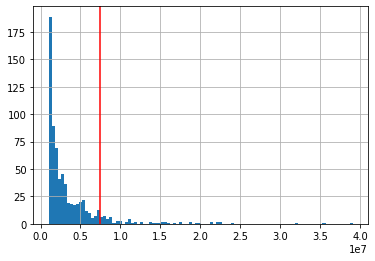

In [176]:
import matplotlib.pyplot as plt


pops = df[(~df.population.isnull())&(df.population > 1_000_000)].population
pops.hist(bins=100)
percentile_90 = np.percentile(pops, q=90)
plt.axvline(percentile_90, color="red")

len([value for value in pops if value > percentile_90]) / len(pops)

In [96]:
#l = [1, 2, 3, 4, 4]
#print(l.index(max(l)))
#max_ = max(l)
#[value for value in l if value == max_]

3


[4, 4]

In [65]:
## Edge case loosing index after reset_index because of unconsistent names

In [63]:
t1 = pd.DataFrame([[1, 2], [2, 2]], columns=["A", "B1"])
t2 = pd.DataFrame([[1, 5], [2, 1]], columns=["A_", "B2"])

t1.set_index('A').join(t2.set_index("A_")).reset_index()

,A,B1,B2
0,1,2,5
1,2,2,1
